# Laboratorio 7

In [383]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import altair as alt

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression 
#alt.themes.enable('opaque')
%matplotlib inline

En este laboratorio utilizaremos los mismos datos de diabetes vistos en la clase

In [384]:
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True, as_frame=True)
diabetes = pd.concat([diabetes_X, diabetes_y], axis=1)
diabetes

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0


## Pregunta 1

(1 pto)

* ¿Por qué la columna de sexo tiene esos valores?
* ¿Cuál es la columna a predecir?
* ¿Crees que es necesario escalar o transformar los datos antes de comenzar el modelamiento?

__Respuesta:__

* Por que los Features estan definidos como numeros reales, entre -.2 < x < .2
* Los features son las columnas a predecir
* En este caso quizas no sea necesario ya que el escalamiento se hace para que queden valores similares de las features y en este caso los valores son similares o relativamente cercanos

## Pregunta 2

(1 pto)

Realiza dos regresiones lineales con todas las _features_, el primer caso incluyendo intercepto y el segundo sin intercepto. Luego obtén la predicción para así calcular el error cuadrático medio y coeficiente de determinación de cada uno de ellos.

In [385]:
regr_with_incerpet =LinearRegression(fit_intercept=True) # Mi modelo
regr_with_incerpet.fit(diabetes_X, diabetes_y)# lo fiteo

LinearRegression()

In [386]:
diabetes_y_pred_with_intercept =regr_with_incerpet.predict(diabetes_X)  # hacer prediccion
#diabetes_y_pred_with_intercept

In [387]:
# Coeficientes
print(f"Coefficients: \n{regr_with_incerpet.coef_}\n")
# Intercepto
print(f"Intercept: \n{regr_with_incerpet.intercept_ }\n")
# Error cuadrático medio
print(f"Mean squared error: {mean_squared_error(diabetes_y, diabetes_y_pred_with_intercept):.2f}\n")
# Coeficiente de determinación
print(f"Coefficient of determination: {r2_score(diabetes_y, diabetes_y_pred_with_intercept):.2f}")

Coefficients: 
[ -10.01219782 -239.81908937  519.83978679  324.39042769 -792.18416163
  476.74583782  101.04457032  177.06417623  751.27932109   67.62538639]

Intercept: 
152.1334841628965

Mean squared error: 2859.69

Coefficient of determination: 0.52


In [388]:
regr_without_incerpet =LinearRegression(fit_intercept=False)
regr_without_incerpet.fit(diabetes_X, diabetes_y)

LinearRegression(fit_intercept=False)

In [389]:
diabetes_y_pred_without_intercept = regr_without_incerpet.predict(diabetes_X)

In [390]:
# Coeficientes
print(f"Coefficients: \n{regr_without_incerpet.coef_}\n")
# Error cuadrático medio
print(f"Mean squared error: {mean_squared_error(diabetes_y, diabetes_y_pred_without_intercept):.2f}\n")
# Coeficiente de determinación
print(f"Coefficient of determination: {r2_score(diabetes_y, diabetes_y_pred_without_intercept):.2f}")


Coefficients: 
[ -10.01219782 -239.81908937  519.83978679  324.39042769 -792.18416163
  476.74583782  101.04457032  177.06417623  751.27932109   67.62538639]

Mean squared error: 26004.29

Coefficient of determination: -3.39


**Pregunta: ¿Qué tan bueno fue el ajuste del modelo?**

__Respuesta:__
 Con intercepto fue decente ya que dio un Mean squared error de 2859.69 y un Coefficient of  determination de 0.52.
 Sin intercepto fue malo ya que dio un Mean squared error de 26004.29 (muy alto) y un Coefficient of  determination de -3.39.

## Pregunta 3

(1 pto)

Realizar multiples regresiones lineales utilizando una sola _feature_ a la vez. 

En cada iteración:

- Crea un arreglo `X_i`con solo una feature filtrando `X` que es el diabetes x.
- Crea un modelo de regresión lineal con intercepto.
- Ajusta el modelo anterior.
- Genera una predicción con el modelo.
- Calcula e imprime las métricas de la pregunta anterior.

In [391]:
for col in diabetes_X:#Iterar por todas las feature, que en nuestro caso es diabetes x      :
    X_i = diabetes_X[col].reset_index().set_index('index')#filtrar para que quede de una sola feature
    regr_i = LinearRegression(fit_intercept=True)# defino modelo con intercepto
    regr_i.fit(X_i, diabetes_y)# lo fiteo
    diabetes_y_pred_i =regr_i.predict(X_i) # obtengo la prediccion
    print(f"Feature: {col}")
    print(f"\tCoefficients: {regr_i.coef_}")
    print(f"\tIntercept: \n{regr_i.intercept_ }\n")
    print(f"\tMean squared error: {mean_squared_error(diabetes_y, diabetes_y_pred_i):.2f}")
    print(f"\tCoefficient of determination: {r2_score(diabetes_y, diabetes_y_pred_i):.2f}\n")

Feature: age
	Coefficients: [304.18307453]
	Intercept: 
152.13348416289605

	Mean squared error: 5720.55
	Coefficient of determination: 0.04

Feature: sex
	Coefficients: [69.71535568]
	Intercept: 
152.13348416289594

	Mean squared error: 5918.89
	Coefficient of determination: 0.00

Feature: bmi
	Coefficients: [949.43526038]
	Intercept: 
152.1334841628967

	Mean squared error: 3890.46
	Coefficient of determination: 0.34

Feature: bp
	Coefficients: [714.7416437]
	Intercept: 
152.13348416289585

	Mean squared error: 4774.10
	Coefficient of determination: 0.19

Feature: s1
	Coefficients: [343.25445189]
	Intercept: 
152.13348416289597

	Mean squared error: 5663.32
	Coefficient of determination: 0.04

Feature: s2
	Coefficients: [281.78459335]
	Intercept: 
152.1334841628959

	Mean squared error: 5750.24
	Coefficient of determination: 0.03

Feature: s3
	Coefficients: [-639.14527932]
	Intercept: 
152.13348416289566

	Mean squared error: 5005.66
	Coefficient of determination: 0.16

Feature: s4
	

**Pregunta: Si tuvieras que escoger una sola _feauture_, ¿Cuál sería? ¿Por qué?**

**Respuesta:** Escogeria el bmi ya que tiene un Mean squared error 3890.46 (bajo en comparacion con los otros) y un	Coefficient of determination: 0.34 (mayor en comparacion con los otros)

## Ejercicio 4

(1 pto)

Con la feature escogida en el ejercicio 3 realiza el siguiente gráfico:

- Scatter Plot
- Eje X: Valores de la feature escogida.
- Eje Y: Valores de la columna a predecir (target).
- En color rojo dibuja la recta correspondiente a la regresión lineal (utilizando `intercept_`y `coefs_`).
- Coloca un título adecuado, nombre de los ejes, etc.

Puedes utilizar `matplotlib` o `altair`, el que prefieras.

In [392]:
bmi=diabetes_X['bmi'].reset_index().set_index('index')
regr = linear_model.LinearRegression(fit_intercept=True).fit(bmi, diabetes_y)
Val_y_pred=regr_i.predict(bmi)
interc=regr.intercept_
coef=regr.coef_
Val_y_pred_2=pd.DataFrame(Val_y_pred).reset_index().set_index('index')

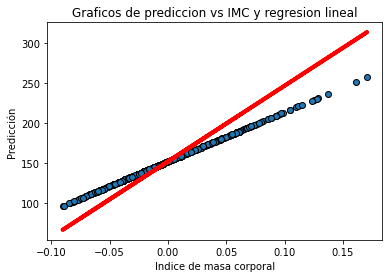

In [393]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.scatter(bmi, Val_y_pred_2, edgecolors=(0, 0, 0))
ax.plot(bmi, coef*bmi+interc, 'r', lw=4)
ax.set_xlabel('Indice de masa corporal')
ax.set_ylabel('Predicción')
plt.title('Graficos de prediccion vs IMC y regresion lineal')
plt.show()
